<a href="https://colab.research.google.com/github/ericalmon/Finance-Project-FIN502/blob/master/Efficient_Frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
!pip install PyPortfolioOpt

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [ ]:
from datetime import datetime 
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import re
import yfinance as yf
from pandas_datareader import data as pdr
import pypfopt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

plt.style.use('fivethirtyeight')




**Portfolio Creation**

Create our portfolio and define weights.


In [ ]:

Weight_list = [0.182,0.188,0.17,0.125,0.172,0.164]
ticks= ['AAPL', 'AMZN', 'NFLX', 'NVDA', 'FB', 'GOOG']


#ticks = [item for item in input("Input stocks in your portfolio separated by space: ").upper().split()]
#print("This is your portfolio: ", ticks)

#Expected portfolio daily return
#for x in ticks: 
  #Weighting = float(input(x + ' weight (decimals): ').strip())
  #Weight_list.append(Weighting)


PortWeights = np.array(Weight_list)
print(Weight_list)


[0.182, 0.188, 0.17, 0.125, 0.172, 0.164]


In [ ]:
stock_start_date = '2005-01-01'
today = datetime.today()

bizday = np.where((today - pd.tseries.offsets.BDay(0)) > today,
         (today - pd.tseries.offsets.BDay(1)),
         (today - pd.tseries.offsets.BDay(0)))

In [ ]:

t = pd.to_datetime(str(bizday))
d = t.strftime('%Y-%m-%d')

project_end = '2020-07-03'
project_beg = '2020-05-11'

In [ ]:
print(d)
print('You have', len(ticks), 'stocks in your portfolio.')

2020-07-10
You have 6 stocks in your portfolio.


In [ ]:
yf.pdr_override()


In [ ]:
#Create function that gets prices in portfolio. 
def getPortfolioInfo(stocks, start, end, col='Adj Close'):
  data = pdr.DataReader(ticks,data_source='yahoo', start=start, end=end)[col]
  return data


In [ ]:
#Get the Adj. Close price
my_stocks = getPortfolioInfo(ticks,stock_start_date ,d)
print(ticks)
fin502 = getPortfolioInfo(ticks, project_beg, project_end)


[*********************100%***********************]  6 of 6 completed
['AAPL', 'AMZN', 'NFLX', 'NVDA', 'FB', 'GOOG']
[*********************100%***********************]  6 of 6 completed


In [ ]:
#Visualize portfolio
def showGraph(stocks=ticks, start= project_beg, end=project_end, col='Adj Close'):
  title = 'Portfolio' +col+ 'History'
  my_stocks = getPortfolioInfo(stocks=stocks,start=start,end=end, col=col)
  plt.figure(figsize=(12.2, 4.5))

  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c)

  plt.title(title)
  plt.xlabel('Date', fontsize=18)
  plt.ylabel(col+'Price USD ($)', fontsize=18)
  plt.legend(my_stocks.columns.values,loc='upper left')
  plt.show()

**Portfolio Statistics**

Calculate daily simple returns


In [ ]:
#Calculate simple returns 
print('Daily Simple Returns')
daily_simple_returns = fin502.pct_change()
daily_simple_returns.head()

Daily Simple Returns


,AAPL,AMZN,FB,GOOG,NFLX,NVDA
Date,,,,,,
2020-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-12,-0.011428,-0.021606,-0.014448,-0.019611,-0.019749,-0.032608
2020-05-13,-0.012074,0.004654,-0.023798,-0.019197,0.014937,-0.002884
2020-05-14,0.006143,0.008839,0.008337,0.005040,0.008397,0.032198
2020-05-15,-0.005912,0.008762,0.019680,0.012580,0.027695,0.057313


Correlation

In [ ]:
print('Correlation')
daily_simple_corr = daily_simple_returns.corr()
annual_corr= daily_simple_corr*252

Correlation


Covariance Matrix

In [ ]:
print("Covariance Matrix")
daily_simple_cov = daily_simple_returns.cov()

#Annual 
annual_cov_matrix = daily_simple_cov*252
#Portfolio Variance
port_var = np.dot(PortWeights.T, np.dot(annual_cov_matrix,PortWeights))
print('Porfolio Variance: ' , port_var)

#Portfolio Std
port_vol = np.sqrt(port_var)
print('Portfolio Volatility: ' , port_vol)

daily_simple_cov



Covariance Matrix
Porfolio Variance:  0.07298093897706369
Portfolio Volatility:  0.2701498454137327


,AAPL,AMZN,FB,GOOG,NFLX,NVDA
AAPL,0.000280,0.000166,0.000294,0.000224,0.000170,0.000247
AMZN,0.000166,0.000239,0.000284,0.000175,0.000265,0.000245
FB,0.000294,0.000284,0.000675,0.000357,0.000344,0.000372
GOOG,0.000224,0.000175,0.000357,0.000285,0.000202,0.000267
NFLX,0.000170,0.000265,0.000344,0.000202,0.000493,0.000294
NVDA,0.000247,0.000245,0.000372,0.000267,0.000294,0.000643


Variance

In [ ]:
print("Variance")
daily_simple_var = daily_simple_returns.var()

Variance


Stock Volatility (Including Visualization)

In [ ]:
#Stock standard deviation 
print('Stock Volatility')
daily_simple_std = daily_simple_returns.std()
daily_simple_std

Stock Volatility


AAPL    0.016748
AMZN    0.015451
FB      0.025984
GOOG    0.016871
NFLX    0.022209
NVDA    0.025358
dtype: float64

Visualize daily simple returns.


<function matplotlib.pyplot.show>

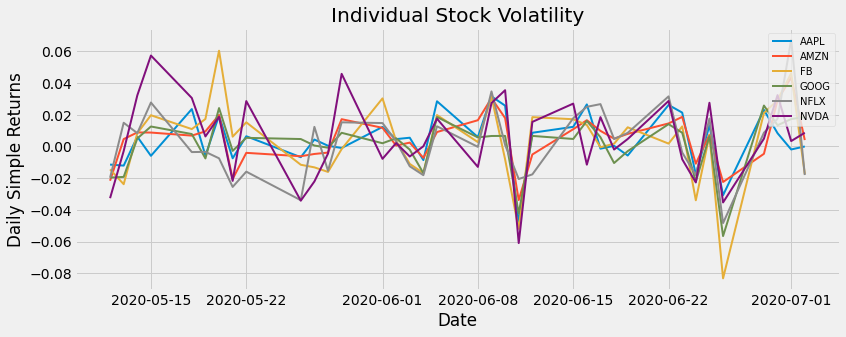

In [ ]:
print('Visualize daily simple returns.')
plot_size = plt.figure(figsize=(12.2, 4.5))

plot_size
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns[c], lw=2, label=c)

plt.legend(loc='upper right', fontsize=10)
plt.title('Individual Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')
plt.show

In [ ]:
print('Daily Average Simple Return')
print(daily_simple_returns.mean())
dailyMeanSR = daily_simple_returns.mean()

Daily Average Simple Return
AAPL    0.004060
AMZN    0.005051
FB      0.002787
GOOG    0.001300
NFLX    0.002385
NVDA    0.005078
dtype: float64


In [ ]:
portfolioSR = np.sum(dailyMeanSR * PortWeights)
portfolio_annualR = portfolioSR*252

print("Daily Portfolio Expected Return:\n" + str(portfolioSR))
print("Expected Annualized Expected Return:\n" + str(portfolioSR*253))

Daily Portfolio Expected Return:
0.0035677749034285474
Expected Annualized Expected Return:
0.9026470505674224


Cumulative Return

In [ ]:
#Calculate growth of the investment 
daily_cm_returns = (daily_simple_returns+1).cumprod()
daily_cm_returns.head

,AAPL,AMZN,FB,GOOG,NFLX,NVDA
Date,,,,,,
2020-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-12,0.988572,0.978394,0.985552,0.980389,0.980251,0.967392
2020-05-13,0.976636,0.982947,0.962098,0.961568,0.994892,0.964602
2020-05-14,0.982635,0.991636,0.970119,0.966414,1.003246,0.995661
2020-05-15,0.976826,1.000324,0.989211,0.978571,1.031032,1.052725


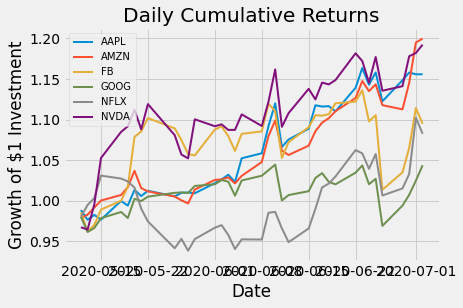

In [ ]:
#Visualize Cm Returns 
plot_size
for c in daily_cm_returns.columns.values:
  plt.plot(daily_cm_returns.index,daily_cm_returns[c],lw=2,label=2)
  plt.legend(my_stocks.columns.values, loc='upper left',fontsize=10)
  plt.xlabel('Date')
  plt.ylabel('Growth of $1 Investment')
  plt.title('Daily Cumulative Returns')
plt.show()

In [ ]:
def getPercent(variable, decimal):
  percentage = str(round(variable,decimal)*100)+'%'
  return(percentage)

In [ ]:
percent_var =  getPercent(port_var,2)
percent_vol = getPercent(port_vol,2)
percent_ret =   getPercent(portfolio_annualR,2)

print("Annual Variance : " + percent_var)
print("Annual Volatility/Risk: " + percent_vol)
print("Expected Annual Return: " + percent_ret)

Annual Variance : 7.000000000000001%
Annual Volatility/Risk: 27.0%
Expected Annual Return: 90.0%


Visualize Covariance Matrix

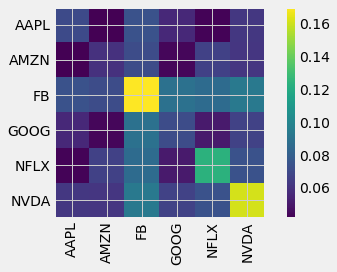

In [ ]:
cov_matrix = risk_models.sample_cov(fin502)
plotting.plot_covariance(cov_matrix)

Use various return methods to identify highest yield.


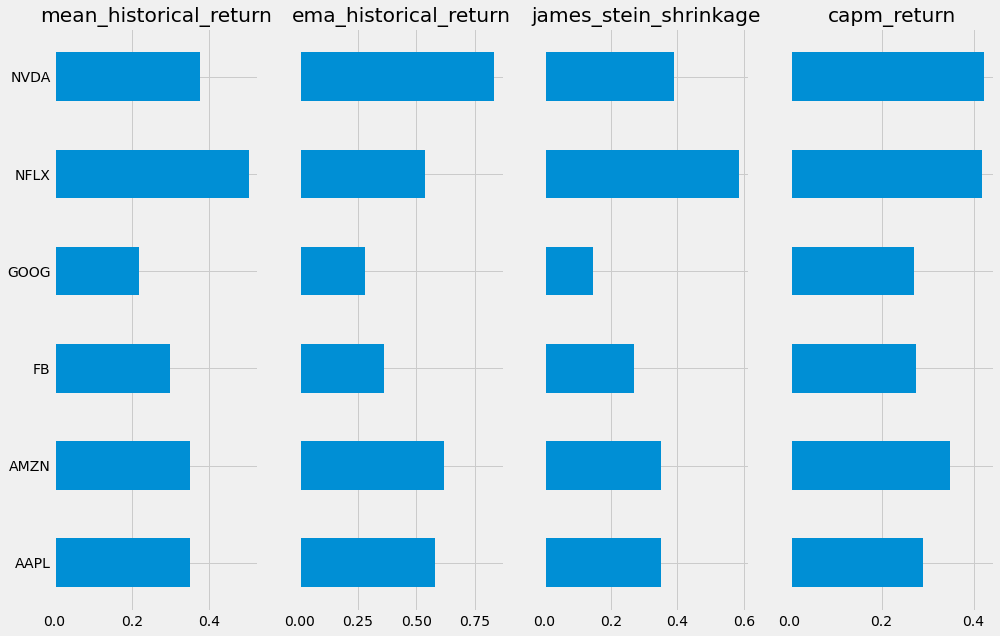

In [ ]:
mean_abs_errors = []
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "james_stein_shrinkage",
    "capm_return",
    ]

#Expected returns and annualized sample covariance mix of asset returns
for method in return_methods:
    mu = expected_returns.return_model(my_stocks, method=method)
S = risk_models.sample_cov(my_stocks)

fig, axs = plt.subplots( 1, len(return_methods),sharey=True, figsize=(15,10))

for i, method in enumerate(return_methods):
    mu = expected_returns.return_model(my_stocks, method=method)
    axs[i].set_title(method)
    mu.plot.barh(ax=axs[i])


mu_capm = expected_returns.return_model(my_stocks, method = 'capm_return')

Calculate Efficient Frontier and optimal weighing.

In [ ]:
#Sharpe ratio Maxed
ef = EfficientFrontier(mu_capm,S)
weights_ef = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print("Cleaned Weights:", cleaned_weights)
sharpe = ef.portfolio_performance(verbose=True)
print(sharpe)

Cleaned Weights: OrderedDict([('AAPL', 0.17994), ('AMZN', 0.17872), ('FB', 0.13935), ('GOOG', 0.15589), ('NFLX', 0.17069), ('NVDA', 0.1754)])
Expected annual return: 34.0%
Annual volatility: 27.5%
Sharpe Ratio: 1.17
(0.34031853585809946, 0.2746166942037367, 1.1664204785032362)


In [ ]:
from pypfopt import plotting
from pypfopt import CLA

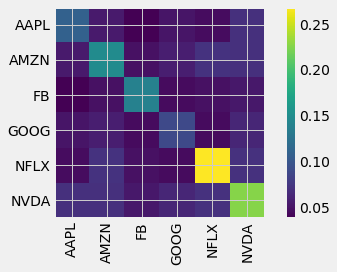

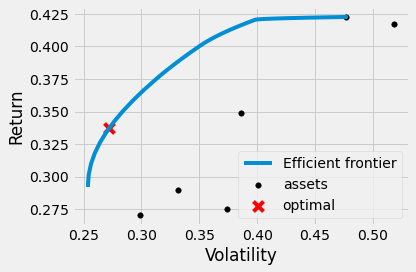

In [ ]:
plotting.plot_covariance(S)
cla = CLA(mu_capm, S)
ax = plotting.plot_efficient_frontier(cla, showfig = True)

Visualize Weighting in shares

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

Discrete Allocation:  {'AAPL': 481.0, 'AMZN': 58.0, 'FB': 580.0, 'GOOG': 105.0, 'NFLX': 346.0, 'NVDA': 446.0}
Funds remaining $68.45


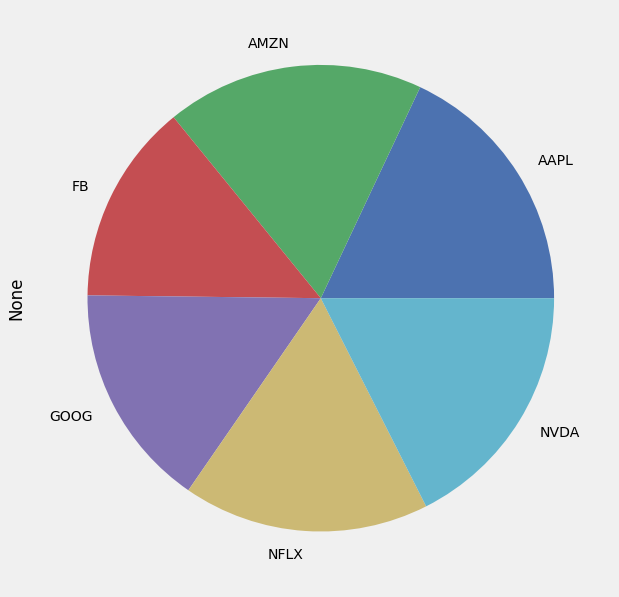

In [ ]:
latest_prices = get_latest_prices(my_stocks)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: ', allocation)
print('Funds remaining ${:.2f}'.format(leftover))

pd.Series(weights).plot.pie(figsize=(10,10));